In [1]:
import pandas as pd
import numpy as np
import datetime
import time
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from random import choices, sample
from gensim.models import Word2Vec
import gc
pd.set_option('display.float_format',lambda x : '%.2f' % x)
from math import log10

In [2]:
with open('./NN_result/lt_df_NN_rank_122days.pkl', 'rb') as file:
    lt_df_NN_rank = pickle.load(file)

In [3]:
full_table = pd.concat(lt_df_NN_rank[15:15+54], ignore_index=True)

In [4]:
full_table['dist'] = full_table.apply(lambda df: df['rank'] - df['NN_rank'], axis=1)

In [5]:
full_table

,target,next,rank,NN_rank,dist
0,102ca9ccb86811e9b0f5acde48001122,e360cdcab86611e987efacde48001122,10.00,7,3.00
1,e360cdcab86611e987efacde48001122,06fb62c2b86711e9867dacde48001122,4.00,4,0.00
2,baaadc26b86711e9b9cbacde48001122,e353a26cb86611e992e5acde48001122,60.00,48,12.00
3,e353a26cb86611e992e5acde48001122,e35fafb4b86611e99d1dacde48001122,59.00,20,39.00
4,e336d7e2b86611e9a7f7acde48001122,e3875b18b86611e9bab5acde48001122,40.00,28,12.00
...,...,...,...,...,...
2176234,17a1fbf4b86711e98eb1acde48001122,1794c89eb86711e99a2eacde48001122,3.00,2,1.00
2176235,1794c89eb86711e99a2eacde48001122,5ba15890b86711e9ab99acde48001122,1.00,1,0.00
2176236,e33344e8b86611e98696acde48001122,e36092b0b86611e98917acde48001122,6.00,1,5.00
2176237,e34457bab86611e9a371acde48001122,17aee940b86711e9a801acde48001122,7.00,20,-13.00


In [6]:
full_table.describe()

,rank,NN_rank,dist
count,2176239.00,2176239.00,2176239.00
mean,20.54,20.74,-0.21
std,24.51,22.74,24.87
min,1.00,1.00,-98.00
25%,3.00,4.00,-10.00
50%,9.00,11.00,0.00
75%,30.00,31.00,8.00
max,99.00,99.00,98.00


In [7]:
table_grby = full_table.groupby(['target'])
pd.DataFrame(table_grby.size())

,0
target,
008f3dccb86811e9b6c1acde48001122,5
008f3e76b86811e98317acde48001122,11
008f42e8b86811e9bd2aacde48001122,3
008f4862b86811e9a907acde48001122,2
008f49cab86811e98f31acde48001122,9
...,...
f94557e6b86b11e98019acde48001122,1
f9456918b86b11e9b213acde48001122,1
f945b88ab86b11e99cacacde48001122,3


In [8]:
df_table  = pd.merge(full_table, pd.DataFrame(table_grby.size()), on=['target'], how='left')

In [9]:
df_table.rename(columns = {0:'occur'}, inplace=True)

In [10]:
# df_table.drop_duplicates(inplace=True, ignore_index=True)

In [11]:
df_table

,target,next,rank,NN_rank,dist,occur
0,102ca9ccb86811e9b0f5acde48001122,e360cdcab86611e987efacde48001122,10.00,7,3.00,45
1,e360cdcab86611e987efacde48001122,06fb62c2b86711e9867dacde48001122,4.00,4,0.00,134
2,baaadc26b86711e9b9cbacde48001122,e353a26cb86611e992e5acde48001122,60.00,48,12.00,48
3,e353a26cb86611e992e5acde48001122,e35fafb4b86611e99d1dacde48001122,59.00,20,39.00,38
4,e336d7e2b86611e9a7f7acde48001122,e3875b18b86611e9bab5acde48001122,40.00,28,12.00,9
...,...,...,...,...,...,...
2176234,17a1fbf4b86711e98eb1acde48001122,1794c89eb86711e99a2eacde48001122,3.00,2,1.00,7
2176235,1794c89eb86711e99a2eacde48001122,5ba15890b86711e9ab99acde48001122,1.00,1,0.00,10
2176236,e33344e8b86611e98696acde48001122,e36092b0b86611e98917acde48001122,6.00,1,5.00,442
2176237,e34457bab86611e9a371acde48001122,17aee940b86711e9a801acde48001122,7.00,20,-13.00,20


In [12]:
df_table.describe()

,rank,NN_rank,dist,occur
count,2176239.00,2176239.00,2176239.00,2176239.00
mean,20.54,20.74,-0.21,112.07
std,24.51,22.74,24.87,371.26
min,1.00,1.00,-98.00,1.00
25%,3.00,4.00,-10.00,8.00
50%,9.00,11.00,0.00,22.00
75%,30.00,31.00,8.00,71.00
max,99.00,99.00,98.00,4931.00


In [13]:
df_table.groupby('occur').mean().describe()

,rank,NN_rank,dist
count,496.00,496.00,496.00
mean,18.71,16.30,2.42
std,6.17,5.25,5.77
min,1.00,2.80,-46.00
25%,14.97,12.94,0.28
50%,19.21,16.48,2.11
75%,21.96,19.70,4.05
max,47.39,47.00,39.70


---

In [17]:
with open('./item_data/en_behavior_emb.pkl', 'rb') as file:
    emb = pickle.load(file)

In [18]:
df_table['Ground_Truth'] = df_table.apply(lambda df: df['rank'] > df['NN_rank'], axis=1)

In [19]:
max_occur = max(df_table['occur'])

In [20]:
df_table['occur_log'] = df_table.apply(lambda df: log10(df['occur'])/log10(max_occur), axis=1)

In [21]:
df_table

,target,next,rank,NN_rank,dist,occur,Ground_Truth,occur_log
0,102ca9ccb86811e9b0f5acde48001122,e360cdcab86611e987efacde48001122,10.00,7,3.00,45,True,0.45
1,e360cdcab86611e987efacde48001122,06fb62c2b86711e9867dacde48001122,4.00,4,0.00,134,False,0.58
2,baaadc26b86711e9b9cbacde48001122,e353a26cb86611e992e5acde48001122,60.00,48,12.00,48,True,0.46
3,e353a26cb86611e992e5acde48001122,e35fafb4b86611e99d1dacde48001122,59.00,20,39.00,38,True,0.43
4,e336d7e2b86611e9a7f7acde48001122,e3875b18b86611e9bab5acde48001122,40.00,28,12.00,9,True,0.26
...,...,...,...,...,...,...,...,...
2176234,17a1fbf4b86711e98eb1acde48001122,1794c89eb86711e99a2eacde48001122,3.00,2,1.00,7,True,0.23
2176235,1794c89eb86711e99a2eacde48001122,5ba15890b86711e9ab99acde48001122,1.00,1,0.00,10,False,0.27
2176236,e33344e8b86611e98696acde48001122,e36092b0b86611e98917acde48001122,6.00,1,5.00,442,True,0.72
2176237,e34457bab86611e9a371acde48001122,17aee940b86711e9a801acde48001122,7.00,20,-13.00,20,False,0.35


In [22]:
training_data = []
not_exist_id = []
Ground_Truth = []
for row in tqdm(df_table.iterrows()):
    if row[1]['target'] not in emb:
        not_exist_id.append(row[1]['target'])
        continue
    training_data.append(np.append(emb[row[1]['target']], [row[1]['occur_log']]))
    Ground_Truth.append(row[1]['Ground_Truth'])

2176239it [03:53, 9303.34it/s]


In [26]:
training_data = np.array(training_data)

In [27]:
len(Ground_Truth)

2176239

In [28]:
X_train, y_train = training_data, Ground_Truth

In [30]:
from sklearn.model_selection import train_test_split
from keras import models, layers, optimizers, losses, metrics, callbacks

Using TensorFlow backend.


In [41]:
model = models.Sequential()
model.add(layers.Dense(512, activation='linear', input_shape=(129,)))
model.add(layers.LeakyReLU(alpha=0.3))
model.add(layers.Dense(256, activation='linear'))
model.add(layers.LeakyReLU(alpha=0.3))
model.add(layers.Dense(128, activation='linear'))
model.add(layers.LeakyReLU(alpha=0.3))
model.add(layers.Dense(64, activation='linear'))
model.add(layers.LeakyReLU(alpha=0.3))
model.add(layers.Dense(1, activation='sigmoid'))

In [42]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.mse])

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               66560     
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)               

In [44]:
# checkpoint
filepath = './saved_model/' + 'switch' + '_' + time.strftime("%m%d", time.localtime()) + ".h5"
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
callbacks_list = [checkpoint]

In [45]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=.3,
                    verbose=1,
                    callbacks=callbacks_list)

Train on 1523367 samples, validate on 652872 samples
Epoch 1/20
1523367/1523367 [==============================] - 31s 21us/step - loss: 0.6725 - mean_squared_error: 0.2398 - val_loss: 0.6710 - val_mean_squared_error: 0.2390

Epoch 00001: val_loss improved from inf to 0.67104, saving model to ./saved_model/switch_0428.h5
Epoch 2/20
1523367/1523367 [==============================] - 31s 21us/step - loss: 0.6668 - mean_squared_error: 0.2371 - val_loss: 0.6752 - val_mean_squared_error: 0.2403

Epoch 00002: val_loss did not improve from 0.67104
Epoch 3/20
1523367/1523367 [==============================] - 31s 21us/step - loss: 0.6642 - mean_squared_error: 0.2359 - val_loss: 0.6666 - val_mean_squared_error: 0.2369

Epoch 00003: val_loss improved from 0.67104 to 0.66656, saving model to ./saved_model/switch_0428.h5
Epoch 4/20
1523367/1523367 [==============================] - 31s 21us/step - loss: 0.6622 - mean_squared_error: 0.2350 - val_loss: 0.6683 - val_mean_squared_error: 0.2378

Epoch 

In [46]:
history.history.keys()

dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])

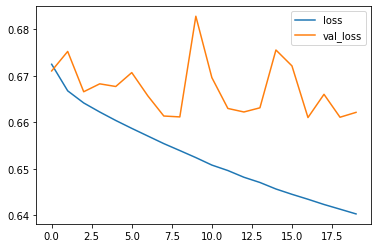

In [47]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

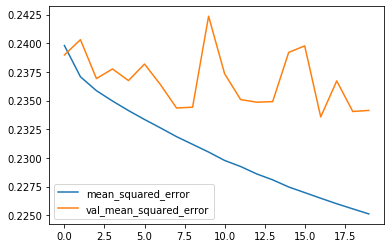

In [48]:
pd.DataFrame(history.history)[['mean_squared_error', 'val_mean_squared_error']].plot()

In [5]:
model = keras.models.load_model('./saved_model/switch_0428.h5')

In [ ]:
#####

In [46]:
df_table.loc[:,['target', 'occur']].to_numpy()

array([['102ca9ccb86811e9b0f5acde48001122', 45],
       ['e360cdcab86611e987efacde48001122', 134],
       ['baaadc26b86711e9b9cbacde48001122', 48],
       ...,
       ['e33344e8b86611e98696acde48001122', 442],
       ['e34457bab86611e9a371acde48001122', 20],
       ['17aee940b86711e9a801acde48001122', 7]], dtype=object)

In [60]:
import xgboost as xgb
model = xgb.XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=160, silent=True, objective='binary:logistic')
model.fit(df_table['occur'].to_numpy().reshape(-1,1), df_table['Ground_Truth'].to_numpy())

XGBoostError: [23:51:39] /workspace/src/c_api/../data/../common/common.h:41: /workspace/src/predictor/../common/device_helpers.cuh: 126: invalid device ordinal
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x54) [0x7f1753ff7614]
  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dh::ThrowOnCudaError(cudaError, char const*, int)+0x159) [0x7f17541eec29]
  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dh::MaxSharedMemory(int)+0x24) [0x7f17542ac354]
  [bt] (3) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::predictor::GPUPredictor::Configure(std::vector<std::pair<std::string, std::string>, std::allocator<std::pair<std::string, std::string> > > const&)+0x19) [0x7f17542ac389]
  [bt] (4) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::gbm::GBTree::Configure(std::vector<std::pair<std::string, std::string>, std::allocator<std::pair<std::string, std::string> > > const&)+0x18b) [0x7f17540a77cb]
  [bt] (5) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::LearnerImpl::Configure()+0x4c6) [0x7f17540e8cb6]
  [bt] (6) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::LearnerImpl::UpdateOneIter(int, xgboost::DMatrix*)+0x6d) [0x7f17540e369d]
  [bt] (7) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(XGBoosterUpdateOneIter+0x29) [0x7f1753fe6639]
  [bt] (8) /usr/lib/x86_64-linux-gnu/libffi.so.6(ffi_call_unix64+0x4c) [0x7f17e1842dae]



In [61]:
from sklearn.linear_model  import LogisticRegression
model = LogisticRegression()
model.fit(df_table['occur'].to_numpy().reshape(-1,1), df_table['Ground_Truth'].to_numpy())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#####

In [49]:
df_table_testday = pd.concat(lt_df_NN_rank[15+54:], ignore_index=True)

In [50]:
df_table_testday.drop_duplicates(inplace=True, ignore_index=True)

In [51]:
df_table_testday.describe()

,rank,NN_rank
count,810982.00,810982.00
mean,25.83,26.63
std,26.32,24.95
min,1.00,1.00
25%,5.00,6.00
50%,15.00,18.00
75%,40.00,41.00
max,99.00,99.00


In [52]:
df_table_testday  = pd.merge(df_table_testday, pd.DataFrame(table_grby.size()), on=['target'], how='left')

In [53]:
df_table_testday.rename(columns = {0:'occur'}, inplace=True)

In [54]:
df_table_testday['occur'].fillna(1, inplace=True)

In [57]:
df_table_testday['Ground_Truth'] = df_table_testday.apply(lambda df: df['rank'] > df['NN_rank'], axis=1)

In [56]:
max_occur = max(df_table_testday['occur'])
df_table_testday['occur_log'] = df_table_testday.apply(lambda df: log10(df['occur'])/log10(max_occur), axis=1)

In [58]:
df_table_testday

,target,next,rank,NN_rank,occur,Ground_Truth,occur_log
0,e3390966b86611e9bb8facde48001122,8bf8b80cb86811e9972dacde48001122,16.00,35,175.00,False,0.61
1,8bf8b80cb86811e9972dacde48001122,f5adf298b86611e9930dacde48001122,11.00,13,106.00,False,0.55
2,f5adf298b86611e9930dacde48001122,f5accde4b86611e9acc7acde48001122,80.00,68,114.00,True,0.56
3,f5accde4b86611e9acc7acde48001122,571cafe2b86c11e99481acde48001122,1.00,40,9.00,False,0.26
4,571cafe2b86c11e99481acde48001122,8bf8b80cb86811e9972dacde48001122,36.00,58,1.00,False,0.00
...,...,...,...,...,...,...,...
810977,56dd0c00b86c11e993e3acde48001122,c2d5056eb86911e9b888acde48001122,65.00,12,1.00,True,0.00
810978,470a8500b86711e9a854acde48001122,470a8e88b86711e9853aacde48001122,25.00,9,27.00,True,0.39
810979,06f92b38b86711e9a019acde48001122,070838e4b86711e98c7bacde48001122,8.00,13,15.00,False,0.32
810980,e376ed6cb86611e982b2acde48001122,0714dd42b86711e988c6acde48001122,16.00,37,37.00,False,0.42


In [81]:
def pred(df):
    if df['target'] not in emb:
        return 0
    else:
        return model.predict(np.append(emb[df['target']], df['occur_log']).reshape(1, -1))

In [80]:
np.append(emb['cc291e9ab86c11e9a816acde48001122'], 0.87).reshape(1, -1)

array([[-4.83024180e-01,  6.89477921e-02, -3.82179826e-01,
        -2.94107735e-01,  8.44309255e-02,  1.69642225e-01,
        -2.32650056e-01, -2.51289099e-01,  1.08615851e+00,
         1.02413408e-01,  5.12220740e-01,  2.67105728e-01,
         7.49039054e-02,  4.76774350e-02, -3.95834982e-01,
         2.86265790e-01, -1.16748385e-01,  1.10159703e-01,
        -5.06963432e-01, -1.72258496e-01, -4.99521166e-01,
         2.86352545e-01,  1.70012310e-01, -2.84648806e-01,
         3.46431494e-01, -3.89954001e-02, -3.56037490e-04,
        -7.51128867e-02,  2.12095857e-01,  3.57350767e-01,
         1.25683099e-01,  2.37040352e-02, -2.96152741e-01,
        -2.19987154e-01,  8.76421779e-02,  3.31665993e-01,
         1.09860294e-01, -1.27033621e-01,  1.26687735e-01,
        -7.12039173e-02,  2.10522085e-01, -2.01698273e-01,
        -6.76261932e-02,  8.38985741e-02, -1.81532174e-01,
         6.75522089e-02,  6.24966085e-01, -4.99506950e-01,
        -1.02229759e-01,  2.24123836e-01, -1.97603360e-0

In [ ]:
df_table_testday['pred'] = df_table_testday.apply(lambda df: pred(df), axis=1)

In [83]:
df_table_testday['pred_switch'] = df_table_testday.apply(lambda df: True if df['pred'][0][0] > 0.5 else False)

,target,next,rank,NN_rank,occur,Ground_Truth,occur_log,pred
0,e3390966b86611e9bb8facde48001122,8bf8b80cb86811e9972dacde48001122,16.00,35,175.00,False,0.61,[[0.2344889]]
1,8bf8b80cb86811e9972dacde48001122,f5adf298b86611e9930dacde48001122,11.00,13,106.00,False,0.55,[[0.48907986]]
2,f5adf298b86611e9930dacde48001122,f5accde4b86611e9acc7acde48001122,80.00,68,114.00,True,0.56,[[0.44520932]]
3,f5accde4b86611e9acc7acde48001122,571cafe2b86c11e99481acde48001122,1.00,40,9.00,False,0.26,[[0.42724645]]
4,571cafe2b86c11e99481acde48001122,8bf8b80cb86811e9972dacde48001122,36.00,58,1.00,False,0.00,[[0.38618258]]
...,...,...,...,...,...,...,...,...
810977,56dd0c00b86c11e993e3acde48001122,c2d5056eb86911e9b888acde48001122,65.00,12,1.00,True,0.00,[[0.45708546]]
810978,470a8500b86711e9a854acde48001122,470a8e88b86711e9853aacde48001122,25.00,9,27.00,True,0.39,[[0.46364492]]
810979,06f92b38b86711e9a019acde48001122,070838e4b86711e98c7bacde48001122,8.00,13,15.00,False,0.32,[[0.5581037]]
810980,e376ed6cb86611e982b2acde48001122,0714dd42b86711e988c6acde48001122,16.00,37,37.00,False,0.42,[[0.54124653]]


In [88]:
df_table_testday['pred_switch_rank'] = df_table_testday.apply(lambda df: df['NN_rank'] if df['pred_switch'] else df['rank'], axis=1)

In [76]:
df_table_testday['pred_switch'] = df_table_testday.apply(lambda df: df['NN_rank'] if df['pred'] else df['rank'], axis=1)

In [89]:
df_table_testday

,target,next,rank,NN_rank,occur,Ground_Truth,occur_log,pred,pred_switch,pred_switch_rank
0,e3390966b86611e9bb8facde48001122,8bf8b80cb86811e9972dacde48001122,16.00,35,175.00,False,0.61,[[0.2344889]],False,16.00
1,8bf8b80cb86811e9972dacde48001122,f5adf298b86611e9930dacde48001122,11.00,13,106.00,False,0.55,[[0.48907986]],False,11.00
2,f5adf298b86611e9930dacde48001122,f5accde4b86611e9acc7acde48001122,80.00,68,114.00,True,0.56,[[0.44520932]],False,80.00
3,f5accde4b86611e9acc7acde48001122,571cafe2b86c11e99481acde48001122,1.00,40,9.00,False,0.26,[[0.42724645]],False,1.00
4,571cafe2b86c11e99481acde48001122,8bf8b80cb86811e9972dacde48001122,36.00,58,1.00,False,0.00,[[0.38618258]],False,36.00
...,...,...,...,...,...,...,...,...,...,...
810977,56dd0c00b86c11e993e3acde48001122,c2d5056eb86911e9b888acde48001122,65.00,12,1.00,True,0.00,[[0.45708546]],False,65.00
810978,470a8500b86711e9a854acde48001122,470a8e88b86711e9853aacde48001122,25.00,9,27.00,True,0.39,[[0.46364492]],False,25.00
810979,06f92b38b86711e9a019acde48001122,070838e4b86711e98c7bacde48001122,8.00,13,15.00,False,0.32,[[0.5581037]],True,13.00
810980,e376ed6cb86611e982b2acde48001122,0714dd42b86711e988c6acde48001122,16.00,37,37.00,False,0.42,[[0.54124653]],True,37.00


In [90]:
df_table_testday.describe()

,rank,NN_rank,occur,occur_log,pred_switch_rank
count,810982.00,810982.00,810982.00,810982.00,810982.00
mean,25.83,26.63,27.90,0.25,25.03
std,26.32,24.95,79.57,0.18,25.56
min,1.00,1.00,1.00,0.00,1.00
25%,5.00,6.00,2.00,0.08,5.00
50%,15.00,18.00,9.00,0.26,15.00
75%,40.00,41.00,25.00,0.38,39.00
max,99.00,99.00,4931.00,1.00,99.00


In [79]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(df_table_testday['Ground_Truth'].tolist(),df_table_testday['pred']))

              precision    recall  f1-score   support

       False       0.56      1.00      0.72    452057
        True       0.57      0.00      0.00    358925

    accuracy                           0.56    810982
   macro avg       0.56      0.50      0.36    810982
weighted avg       0.56      0.56      0.40    810982



---

In [17]:
target_grby = df_table.groupby(['target'])
# target_grby.get_group('117092')['dist'].mean()

In [18]:
target_array = df_table['target'].unique()
training_table = pd.DataFrame({'target': target_array})
training_table  = pd.merge(training_table, pd.DataFrame(table_grby.size()), on=['target'], how='left')
training_table.rename(columns = {0:'occur'}, inplace=True)

In [19]:
training_table['rank'] = training_table.apply(lambda df: target_grby.get_group(df['target'])['rank'].mean(), axis=1)
training_table['NN_rank'] = training_table.apply(lambda df: target_grby.get_group(df['target'])['NN_rank'].mean(), axis=1)
training_table['label'] = training_table.apply(lambda df: df['rank'] > df['NN_rank'], axis=1)
training_table['dist'] = training_table.apply(lambda df: target_grby.get_group(df['target'])['dist'].mean(), axis=1)
# training_table['label_dist'] = training_table.apply(lambda df: df['dist'] > 0, axis=1)

In [20]:
training_table

,target,occur,rank,NN_rank,label,dist
0,102ca9ccb86811e9b0f5acde48001122,45,14.91,10.18,True,4.73
1,e360cdcab86611e987efacde48001122,134,9.13,6.78,True,2.34
2,baaadc26b86711e9b9cbacde48001122,48,16.96,33.44,False,-16.48
3,e353a26cb86611e992e5acde48001122,38,24.16,28.97,False,-4.82
4,e336d7e2b86611e9a7f7acde48001122,9,28.33,20.67,True,7.67
...,...,...,...,...,...,...
252458,09bc7246b86a11e99a9dacde48001122,1,1.00,1.00,False,0.00
252459,f8297b4ab86a11e9a645acde48001122,1,1.00,1.00,False,0.00
252460,6c589d58b86711e9a4f2acde48001122,1,6.00,4.00,True,2.00
252461,6c60ab54b86711e987faacde48001122,1,1.00,1.00,False,0.00


In [21]:
# training_table['switch'] = training_table.apply(lambda df: df['NN_rank'] if df['rank'] > df['NN_rank'] else df['rank'], axis=1)

In [22]:
def trans(df):
    if df['label'] and df['occur']==1:
        if df['dist'] < 25:
            return False
    return df['label']

In [23]:
training_table['label_x'] = training_table.apply(trans , axis=1)

In [24]:
training_table

,target,occur,rank,NN_rank,label,dist,label_x
0,102ca9ccb86811e9b0f5acde48001122,45,14.91,10.18,True,4.73,True
1,e360cdcab86611e987efacde48001122,134,9.13,6.78,True,2.34,True
2,baaadc26b86711e9b9cbacde48001122,48,16.96,33.44,False,-16.48,False
3,e353a26cb86611e992e5acde48001122,38,24.16,28.97,False,-4.82,False
4,e336d7e2b86611e9a7f7acde48001122,9,28.33,20.67,True,7.67,True
...,...,...,...,...,...,...,...
252458,09bc7246b86a11e99a9dacde48001122,1,1.00,1.00,False,0.00,False
252459,f8297b4ab86a11e9a645acde48001122,1,1.00,1.00,False,0.00,False
252460,6c589d58b86711e9a4f2acde48001122,1,6.00,4.00,True,2.00,False
252461,6c60ab54b86711e987faacde48001122,1,1.00,1.00,False,0.00,False


In [25]:
training_table['label'].value_counts()

False    149030
True     103433
Name: label, dtype: int64

In [26]:
training_table['label_x'].value_counts()

False    165252
True      87211
Name: label_x, dtype: int64

---

In [27]:
df_table_testday = pd.concat(lt_df_NN_rank[15+54:], ignore_index=True)

In [28]:
df_table_testday.drop_duplicates(inplace=True, ignore_index=True)

In [29]:
df_table_testday.describe()

,rank,NN_rank
count,810982.00,810982.00
mean,25.83,26.63
std,26.32,24.95
min,1.00,1.00
25%,5.00,6.00
50%,15.00,18.00
75%,40.00,41.00
max,99.00,99.00


In [30]:
switch_table = training_table.drop(columns=['rank', 'NN_rank', 'dist'])

In [60]:
del df_table_testday_switch

In [61]:
df_table_testday_switch = pd.merge(df_table_testday, switch_table, on=['target'], how='left')

In [62]:
df_table_testday_switch['Ground_Truth'] = df_table_testday_switch.apply(lambda df: df['rank'] > df['NN_rank'], axis=1)

In [63]:
df_table_testday_switch['switch'] = df_table_testday_switch.apply(lambda df: df['NN_rank'] if df['label'] else df['rank'], axis=1)

In [64]:
df_table_testday_switch['switch_fillna_NN'] = df_table_testday_switch.apply(lambda df: df['NN_rank'] if np.isnan(df['label']) else df['switch'], axis=1)

In [65]:
df_table_testday_switch['switch_fillna_knn'] = df_table_testday_switch.apply(lambda df: df['rank'] if np.isnan(df['label']) else df['switch'], axis=1)

In [66]:
# df_table_testday_switch['switch_x'] = df_table_testday_switch.apply(lambda df: df['NN_rank'] if df['label_x'] else df['rank'], axis=1)

In [67]:
df_table_testday_switch

,target,next,rank,NN_rank,occur,label,label_x,Ground_Truth,switch,switch_fillna_NN,switch_fillna_knn
0,e3390966b86611e9bb8facde48001122,8bf8b80cb86811e9972dacde48001122,16.00,35,175.00,False,False,False,16.00,16.00,16.00
1,8bf8b80cb86811e9972dacde48001122,f5adf298b86611e9930dacde48001122,11.00,13,106.00,True,True,False,13.00,13.00,13.00
2,f5adf298b86611e9930dacde48001122,f5accde4b86611e9acc7acde48001122,80.00,68,114.00,True,True,True,68.00,68.00,68.00
3,f5accde4b86611e9acc7acde48001122,571cafe2b86c11e99481acde48001122,1.00,40,9.00,False,False,False,1.00,1.00,1.00
4,571cafe2b86c11e99481acde48001122,8bf8b80cb86811e9972dacde48001122,36.00,58,1.00,False,False,False,36.00,36.00,36.00
...,...,...,...,...,...,...,...,...,...,...,...
810977,56dd0c00b86c11e993e3acde48001122,c2d5056eb86911e9b888acde48001122,65.00,12,nan,NaN,NaN,True,12.00,12.00,65.00
810978,470a8500b86711e9a854acde48001122,470a8e88b86711e9853aacde48001122,25.00,9,27.00,True,True,True,9.00,9.00,9.00
810979,06f92b38b86711e9a019acde48001122,070838e4b86711e98c7bacde48001122,8.00,13,15.00,True,True,False,13.00,13.00,13.00
810980,e376ed6cb86611e982b2acde48001122,0714dd42b86711e988c6acde48001122,16.00,37,37.00,True,True,False,37.00,37.00,37.00


In [38]:
bool(np.NaN)

True

In [42]:
df_table_testday_switch[df_table_testday_switch['label'].isnull()]

,target,next,rank,NN_rank,occur,label,label_x,Ground_Truth,switch,switch_fill_knn,switch_fill_NN
32,f592d6b4b86611e995dcacde48001122,2f5e4dccb86711e98f55acde48001122,20.00,20,nan,NaN,NaN,False,20.00,20.00,20.00
49,e36c3c9eb86611e9bf1facde48001122,1791656eb86711e9b707acde48001122,14.00,42,nan,NaN,NaN,False,42.00,14.00,42.00
86,073b09a4b86711e9a445acde48001122,5c052686b86711e9851dacde48001122,42.00,60,nan,NaN,NaN,False,60.00,42.00,60.00
240,07159fc0b86711e999e6acde48001122,07159f3eb86711e99bd3acde48001122,1.00,13,nan,NaN,NaN,False,13.00,1.00,13.00
250,5c04e6dab86711e995e5acde48001122,2f5c47c2b86711e99d2cacde48001122,9.00,10,nan,NaN,NaN,False,10.00,9.00,10.00
...,...,...,...,...,...,...,...,...,...,...,...
810931,e37781fab86611e9bcc4acde48001122,472b9d6cb86711e98a65acde48001122,21.00,94,nan,NaN,NaN,False,94.00,21.00,94.00
810932,472b9d6cb86711e98a65acde48001122,072c9450b86711e9a8adacde48001122,45.00,57,nan,NaN,NaN,False,57.00,45.00,57.00
810948,16ba9ae2b86d11e985c0acde48001122,e33b6012b86611e99398acde48001122,33.00,8,nan,NaN,NaN,True,8.00,33.00,8.00
810977,56dd0c00b86c11e993e3acde48001122,c2d5056eb86911e9b888acde48001122,65.00,12,nan,NaN,NaN,True,12.00,65.00,12.00


In [68]:
df_table_testday_switch.describe()

,rank,NN_rank,occur,switch,switch_fillna_NN,switch_fillna_knn
count,810982.00,810982.00,718160.00,810982.00,810982.00,810982.00
mean,25.83,26.63,31.38,24.89,24.89,24.47
std,26.32,24.95,83.93,24.93,24.93,24.86
min,1.00,1.00,1.00,1.00,1.00,1.00
25%,5.00,6.00,4.00,5.00,5.00,5.00
50%,15.00,18.00,11.00,15.00,15.00,15.00
75%,40.00,41.00,28.00,38.00,38.00,37.00
max,99.00,99.00,4931.00,99.00,99.00,99.00


In [36]:
df_table_testday_switch.describe()

,rank,NN_rank,occur,switch,switch_fill,switch_x
count,810982.00,810982.00,718160.00,810982.00,810982.00,810982.00
mean,25.83,26.12,31.38,24.74,24.74,24.72
std,26.32,24.85,83.93,24.90,24.90,24.91
min,1.00,1.00,1.00,1.00,1.00,1.00
25%,5.00,6.00,4.00,5.00,5.00,5.00
50%,15.00,17.00,11.00,15.00,15.00,15.00
75%,40.00,40.00,28.00,38.00,38.00,38.00
max,99.00,99.00,4931.00,99.00,99.00,99.00


In [37]:
df_table_testday_switch['switch'].isnull().sum()

0

In [38]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(df_table_testday_switch['real_label'].tolist(),df_table_testday_switch['label_x'].fillna(True).tolist()))

              precision    recall  f1-score   support

       False       0.60      0.49      0.54    448579
        True       0.49      0.60      0.54    362403

    accuracy                           0.54    810982
   macro avg       0.55      0.55      0.54    810982
weighted avg       0.55      0.54      0.54    810982

